In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data_modified.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [4]:
from sklearn.model_selection import train_test_split

features = df.drop(['date', 'street', 'city', 'statezip', 'country', 'price'], axis=1)
target = df['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Data split successfully!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split successfully!
X_train shape: (3680, 12)
X_test shape: (920, 12)
y_train shape: (3680,)
y_test shape: (920,)


In [5]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [7]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully!")

Random Forest Regressor model trained successfully!


## Compare results



In [12]:
print("Linear Regression Metrics:")
print(f"  MAE: {linear_mae:.2f}")
print(f"  RMSE: {linear_rmse:.2f}")
print(f"  R²: {linear_r2:.2f}")
print("\nDecision Tree Regressor Metrics:")
print(f"  MAE: {dt_mae:.2f}")
print(f"  RMSE: {dt_rmse:.2f}")
print(f"  R²: {dt_r2:.2f}")
print("\nRandom Forest Regressor Metrics:")
print(f"  MAE: {rf_mae:.2f}")
print(f"  RMSE: {rf_rmse:.2f}")
print(f"  R²: {rf_r2:.2f}")

Linear Regression Metrics:
  MAE: 210908.17
  RMSE: 993439.36
  R²: 0.03

Decision Tree Regressor Metrics:
  MAE: 262910.02
  RMSE: 1025729.90
  R²: -0.03

Random Forest Regressor Metrics:
  MAE: 208109.71
  RMSE: 995879.44
  R²: 0.03


## Visualize Model Performance



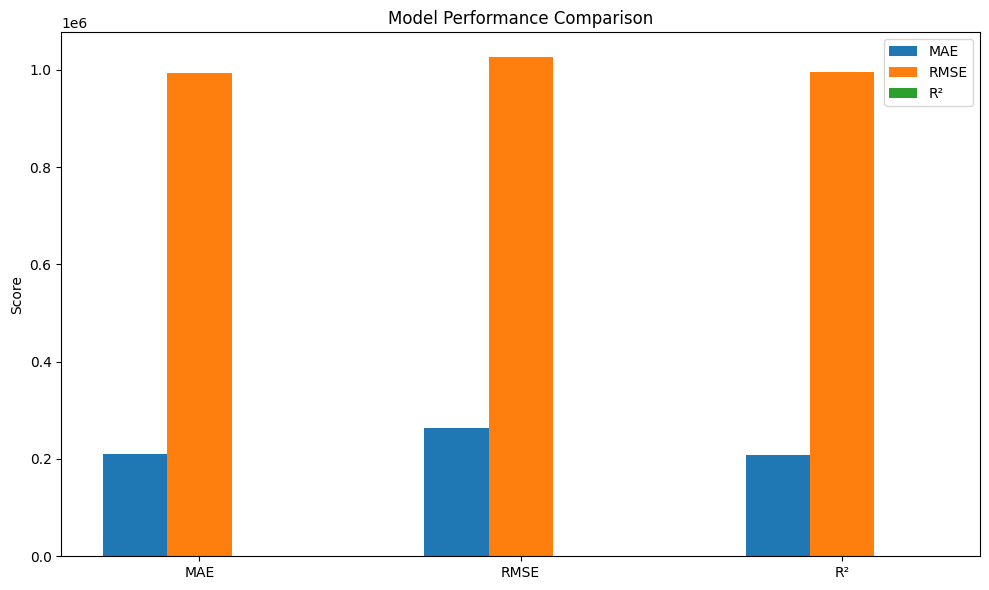

In [13]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['MAE', 'RMSE', 'R²']
models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
mae_scores = [linear_mae, dt_mae, rf_mae]
rmse_scores = [linear_rmse, dt_rmse, rf_rmse]
r2_scores = [linear_r2, dt_r2, rf_r2]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, mae_scores, width, label='MAE')
rects2 = ax.bar(x, rmse_scores, width, label='RMSE')
rects3 = ax.bar(x + width, r2_scores, width, label='R²')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

## Visualize Best Model Predictions



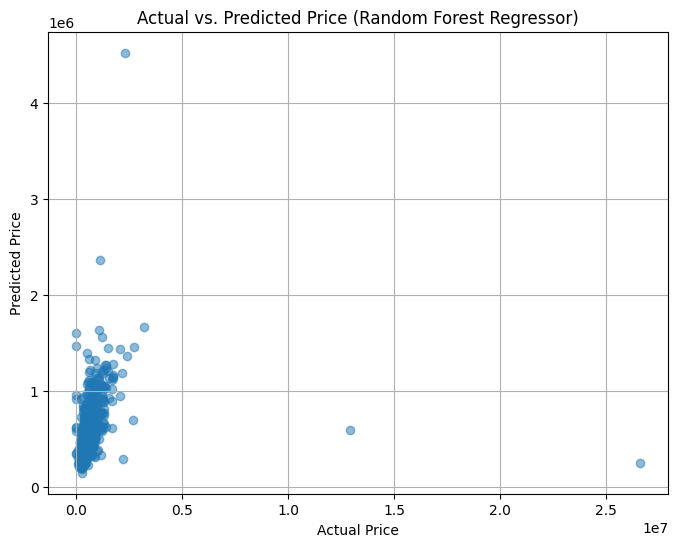

In [14]:
# Make predictions with the best model (Random Forest Regressor)
rf_predictions = random_forest_regressor.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price (Random Forest Regressor)")
plt.grid(True)
plt.show()

**Which model performed best, and why do you think so?**

Looking at the MAE, RMSE, and R² scores, the Random Forest Regressor and Linear Regression models performed very similarly, and slightly better than the Decision Tree Regressor. Both Linear Regression and Random Forest Regressor had lower MAE and RMSE, and positive R² scores (though very close to zero). The Decision Tree Regressor had a negative R² score, indicating it performed worse than simply predicting the mean. While the differences are small, the Random Forest Regressor had a slightly lower MAE and similar R² compared to Linear Regression.

**What trade-offs did you notice (speed vs accuracy vs interpretability)?**

Speed: Linear Regression is generally the fastest to train, followed by Decision Tree, and then Random Forest (due to training multiple trees).
Accuracy: In this case, Linear Regression and Random Forest showed similar, albeit low, accuracy based on the metrics. The Decision Tree performed the worst.
Interpretability: Linear Regression is the most interpretable, as the coefficients directly show the impact of each feature. Decision Trees are also relatively interpretable (you can visualize the tree), while Random Forests are less so because they combine the predictions of many trees.

**How could you improve the models further?**

Feature Engineering: The low R² values suggest that the current features might not be sufficient to accurately predict the price. We could create new features from existing ones (e.g., age of the house from yr_built and date, or interaction terms between features).
Feature Selection: Some features might be irrelevant or redundant. We could use feature selection techniques to identify the most important features.
Handling Categorical Features: The categorical features like 'street', 'city', 'statezip', and 'country' were dropped. One-hot encoding or other techniques could be used to include them in the models.
Outlier Detection and Removal: The scatter plot showed some potential outliers (very high actual prices with relatively low predicted prices). Removing or transforming outliers could improve model performance.
Hyperparameter Tuning: The default hyperparameters were used for Decision Tree and Random Forest. Tuning these parameters (e.g., max depth for Decision Tree, number of estimators for Random Forest) could improve performance.
Trying Other Models: Exploring other regression algorithms like Gradient Boosting Machines (e.g., XGBoost, LightGBM) or Support Vector Regressors could yield better results.
Data Scaling: Scaling numerical features could improve the performance of some models, although tree-based models are generally less sensitive to scaling.


















